## Simple Residual-CNN: Functional API

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

In [3]:
# CNN with Residual-connections using Functional API
# A toy ResNet model
# Refer: https://www.tensorflow.org/guide/keras/functional

def toyResNet():
    inputs = keras.Input(shape=(32, 32, 3), name='img')
    x = layers.Conv2D(32, 3, activation='relu')(inputs)
    x = layers.Conv2D(64, 3, activation='relu')(x)
    block_1_output = layers.MaxPooling2D(3)(x)

    x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    block_2_output = layers.add([x, block_1_output])

    x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    block_3_output = layers.add([x, block_2_output])

    x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10)(x)

    model = keras.Model(inputs, outputs, name='toy_resnet')
    return model

In [ ]:
model_t = toyResNet()
keras.utils.plot_model(model_t, 'mini_resnet.png', show_shapes=True)

In [ ]:
model_t.summary()

# CONV: 32 X (3X3X3) + 32 = 896
# CONV: 64 x (3X3X32) + 64 = 18496

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_8[0][0]                   
_________________________________________________________________________________________

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# pre-process
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(x_train.shape)
print(x_test.shape)

model_t.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

model_t.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 1.2591 - acc: 0.5407 - val_loss: 1.1253 - val_acc: 0.5907
Epoch 2/10
625/625 [==============================] - 5s 9ms/step - loss: 1.0720 - acc: 0.6148 - val_loss: 0.9629 - val_acc: 0.6548
Epoch 3/10
625/625 [==============================] - 5s 9ms/step - loss: 0.9386 - acc: 0.6656 - val_loss: 0.9159 - val_acc: 0.6857
Epoch 4/10
625/625 [==============================] - 5s 9ms/step - loss: 0.8442 - acc: 0.7040 - val_loss: 0.8114 - val_acc: 0.7132
Epoch 5/10
625/625 [==============================] - 5s 9ms/step - loss: 0.7657 - acc: 0.7313 - val_loss: 0.8072 - val_acc: 0.7152
Epoch 6/10
625/625 [==============================] - 5s 9ms/step - loss: 0.7121 - acc: 0.7522 - val_loss: 0.7315 - val_acc: 0.7455
Epoch 7/10
625/625 [==============================] - 5s 9ms/step - loss: 0.6517 - acc: 0.7720 - val_loss: 0.7134 - val_acc: 0.7553
Epoch 8/10
625/625 [==================

## Accessing model weights

In [ ]:
print(model_t.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fefb0d214a8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d50080>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d21898>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fefb0d50b70>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb1190748>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d1d2b0>, <tensorflow.python.keras.layers.merge.Add object at 0x7fefb0d21828>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d1d400>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fefb0d252e8>, <tensorflow.python.keras.layers.merge.Add object at 0x7fefb4189eb8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fef54d4c470>, <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fefb744e5f8>, <tensorflow.python.keras.layers.core.Dense object

In [ ]:
print(model_t.layers[2])

In [ ]:
print(model_t.layers[2].filters)
#Refer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

64


In [ ]:
print(len(model_t.layers[2].get_weights()))

# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/python/keras/layers/convolutional.py
# https://github.com/tensorflow/tensorflow/blob/69ccb409a0b2fe72ddc5a074f5d109216dc46435/tensorflow/python/keras/engine/base_layer.py#L97


2


In [ ]:
model_t.layers[2].get_weights()[0].shape
# Kernel-size:3X3X32
# Num-Kernels:64

(3, 3, 32, 64)

In [ ]:
model_t.layers[2].get_weights()[1].shape
# bias-terms for each kernel.

(64,)

In [ ]:
w = (model_t.layers[2].get_weights()[0]).reshape((-1,1))
print(w.shape)

(18432, 1)


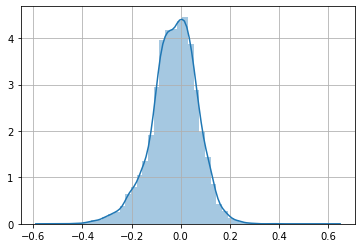

In [ ]:
import seaborn as sns
plt.grid()
sns.distplot(w,hist=True, kde=True)

In [ ]:
# visualize the kernels which are weights in a CNN model
# 1st CNN layer
model_t.layers[1].get_weights()[0].shape

(3, 3, 3, 32)

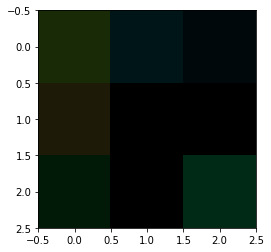

In [ ]:
kernels = model_t.layers[1].get_weights()[0]
k1 = kernels[:,:,:,1]
plt.imshow(k1, interpolation="nearest")
plt.show()


## Saving and loading models

In [ ]:
# Refer: https://www.tensorflow.org/api_docs/python/tf/keras/Model#save
# Tutorial: https://www.tensorflow.org/tutorials/keras/save_and_load

! mkdir -p saved_model
model_t.save('saved_model/model_t') 


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: saved_model/model_t/assets


INFO:tensorflow:Assets written to: saved_model/model_t/assets


In [ ]:
!ls saved_model/model_t

assets	saved_model.pb	variables


In [ ]:
# load a model
loaded_model = tf.keras.models.load_model('saved_model/model_t')

# Check its architecture
loaded_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_7[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_8[0][0]                   
_________________________________________________________________________________________

## Custom Layers

In [ ]:
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [ ]:
# Exisiting layers: https://www.tensorflow.org/api_docs/python/tf/keras/layers

# MyDenseLayer
class MyDenseLayer(tf.keras.layers.Layer): #inheritence

  ## where you can do all input-independent initialization
  def __init__(self, num_outputs): 
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs


  ## where you know the shapes of the input tensors and can do the rest of the initialization
  def build(self, input_shape): 
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]),
                                         self.num_outputs])
  ## where you do the forward computation
  def call(self, input):
    return tf.matmul(input, self.kernel)

layer = MyDenseLayer(10)

print(layer.num_outputs)
print(layer.kernel)

10


AttributeError: ignored

In [ ]:
layer(tf.zeros([10, 5])) # Calling the layer `.builds` it.

# given the input size, now it can interpret the kernel size and initialize it via the build()

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
print(layer.variables)

[<tf.Variable 'my_dense_layer_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.2733447 , -0.31889147,  0.31735176, -0.4506014 ,  0.55678517,
         0.15834099, -0.32280594, -0.33270177, -0.601394  , -0.02036089],
       [-0.47975332, -0.15727279, -0.4489073 ,  0.63078755, -0.12309867,
        -0.14747193,  0.04385281, -0.44840246, -0.61481273, -0.11294603],
       [-0.32665017, -0.29493317, -0.5049247 , -0.5141939 ,  0.4977911 ,
        -0.44643134, -0.26307413,  0.6080802 , -0.62649196, -0.41360104],
       [-0.23904061, -0.05394846,  0.59942526,  0.0676176 , -0.2509706 ,
         0.25489336, -0.41821444, -0.598789  , -0.2573936 , -0.61921656],
       [-0.18097442, -0.28276855,  0.01688099,  0.4422477 ,  0.26025486,
         0.05569458, -0.5980055 ,  0.5381276 ,  0.42125326,  0.44820637]],
      dtype=float32)>]


In [ ]:
print(layer.kernel)

<tf.Variable 'my_dense_layer_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.2733447 , -0.31889147,  0.31735176, -0.4506014 ,  0.55678517,
         0.15834099, -0.32280594, -0.33270177, -0.601394  , -0.02036089],
       [-0.47975332, -0.15727279, -0.4489073 ,  0.63078755, -0.12309867,
        -0.14747193,  0.04385281, -0.44840246, -0.61481273, -0.11294603],
       [-0.32665017, -0.29493317, -0.5049247 , -0.5141939 ,  0.4977911 ,
        -0.44643134, -0.26307413,  0.6080802 , -0.62649196, -0.41360104],
       [-0.23904061, -0.05394846,  0.59942526,  0.0676176 , -0.2509706 ,
         0.25489336, -0.41821444, -0.598789  , -0.2573936 , -0.61921656],
       [-0.18097442, -0.28276855,  0.01688099,  0.4422477 ,  0.26025486,
         0.05569458, -0.5980055 ,  0.5381276 ,  0.42125326,  0.44820637]],
      dtype=float32)>


In [ ]:
print(layer.bias)

AttributeError: ignored

In [ ]:
''' Now, you can use this MyDenseLayer in any model of our choice just like a 
 Dense Layer without bias terms
'''


In [ ]:
class CustomDropout(layers.Layer):

  def __init__(self, rate, **kwargs):
    super(CustomDropout, self).__init__(**kwargs)
    self.rate = rate

  def call(self, inputs):
    if training:
        return tf.nn.dropout(inputs, rate=self.rate)
    return inputs

layer_d = CustomDropout(rate=0.1);

print(layer_d.variables)

[]


## GradientTape

In [ ]:
# For automatic differentiation
# Very useful when we want to have fine control over the differentiation

# Refer: https://www.tensorflow.org/api_docs/python/tf/GradientTape
x = tf.Variable(3.0, trainable=True)
with tf.GradientTape() as t:
    t.watch(x)
    y = x**2

print(t.gradient(y, x).numpy())

6.0


In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  with tf.GradientTape() as gg:
    gg.watch(x)
    y = x * x
  dy_dx = gg.gradient(y, x)     # Will compute to 6.0
d2y_dx2 = g.gradient(dy_dx, x)  # Will compute to 2.0

print(dy_dx)
print(d2y_dx2)

tf.Tensor(6.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
  z = y * y
dz_dx = g.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = g.gradient(y, x)  # 6.0



RuntimeError: ignored

In [ ]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  y = x * x
  z = y * y
dz_dx = g.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = g.gradient(y, x)  # 6.0

print(dz_dx,dy_dx)


del g  # Drop the reference to the tape

tf.Tensor(108.0, shape=(), dtype=float32) tf.Tensor(6.0, shape=(), dtype=float32)
